In [1]:
!pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Familiarize yourself with the Cole-Cole model
Finish this function

In [5]:
def ColeCole(rho_0, rho_infty, nu, tau, breath):
    omega = nu * 2.*np.pi # convert Hz to angular frequency 
    rho_cc = rho_infty + ((rho_0-rho_infty)/(1+(1j*omega*tau)**breath)) # fix this line, 1j == sqrt(-1) 
    return rho_cc

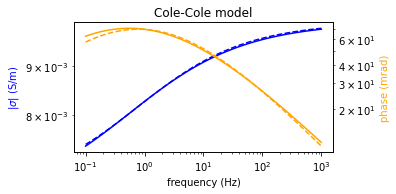

In [40]:
##########################
# Cole-Cole parameters    #
rho_0 = 155               #
rho_infty = 100           #
tau = .5                  #
breath = 0.4              #
##########################

####################################################
####### YOU DON'T NEED TO CHANGE ANYTHING BELOW HERE
####################################################

nu = np.exp(np.linspace(np.log(1e-1),np.log(1e3),100))

# read in saved file
rho1 = np.load("rho.npy", allow_pickle=True)
rho = ColeCole(rho_0, rho_infty, nu, tau, breath)

fig = plt.figure(figsize=[6,3])
ax1 = fig.add_axes([.2,.2,.6,.6])
ax2 = ax1.twinx()
ax2.set_yscale('log')
ax1.set_yscale('log')
ax1.set_xscale('log')
    
ax1.plot(nu, np.abs(1./rho), color='blue')
ax1.plot(nu, np.abs(1./rho1), '--', color='blue')

ax2.plot(nu, 1000.*np.abs(np.angle(1./rho)), color='orange')
ax2.plot(nu, 1000.*np.abs(np.angle(1./rho1)), '--', color='orange')
   
ax2.set_ylabel("phase (mrad)", color='orange') 
ax1.set_ylabel("$|\sigma|$ (S/m)", color='blue') 
ax1.set_xlabel("frequency (Hz)", color='black') 
ax1.set_title("Cole-Cole model") 

# uncomment to save pdf 
plt.savefig("sipfit.pdf", transparent=True)

plt.show()